# Import libraries

In [2]:
import argparse
import warnings
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from fbprophet import Prophet

from fbprophet.plot import add_changepoints_to_plot
from utils.plot import plot_observed_vs_forecast

warnings.filterwarnings("ignore")
plt.style.use('ggplot')

Importing plotly failed. Interactive plots will not work.


# Covid EDA

## Load time series

In [3]:
# Load from csv.
ts = pd.read_csv('../data/covid/confirmed_cases.csv')

# Set column names as specified by Prophet's manual.
ts.columns = ['ds', 'y']

## Plot time series

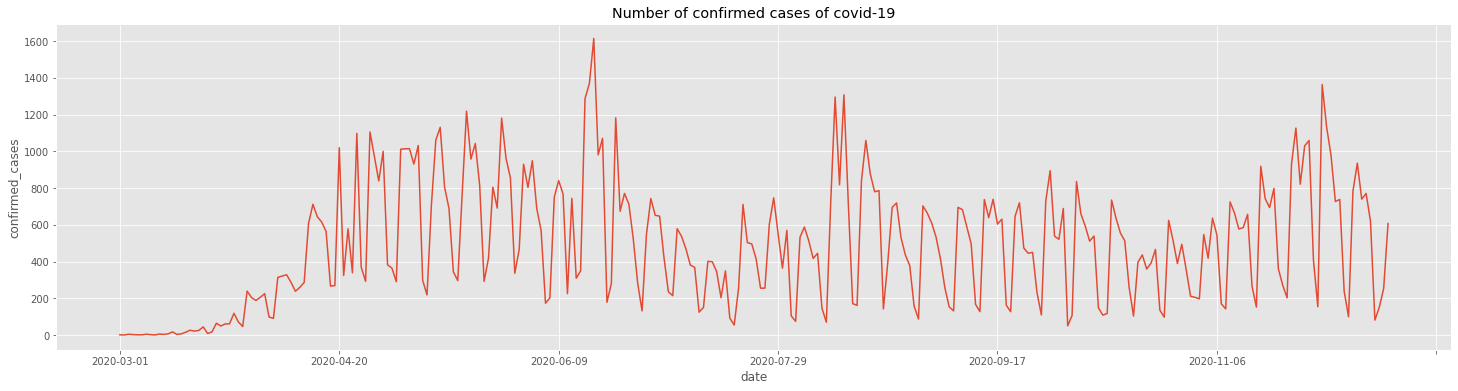

In [4]:
ts.set_index('ds', drop=True).plot(figsize=(25, 6), title="Number of confirmed cases of covid-19", legend=False, xlabel='date', ylabel='confirmed_cases');

## Trend EDA

### Growth: "logistic" or "linear"? How to estimate "cap" and "floor"?

In [5]:
ts['y'].max()

1615

In [6]:
ts['y'].min()

0

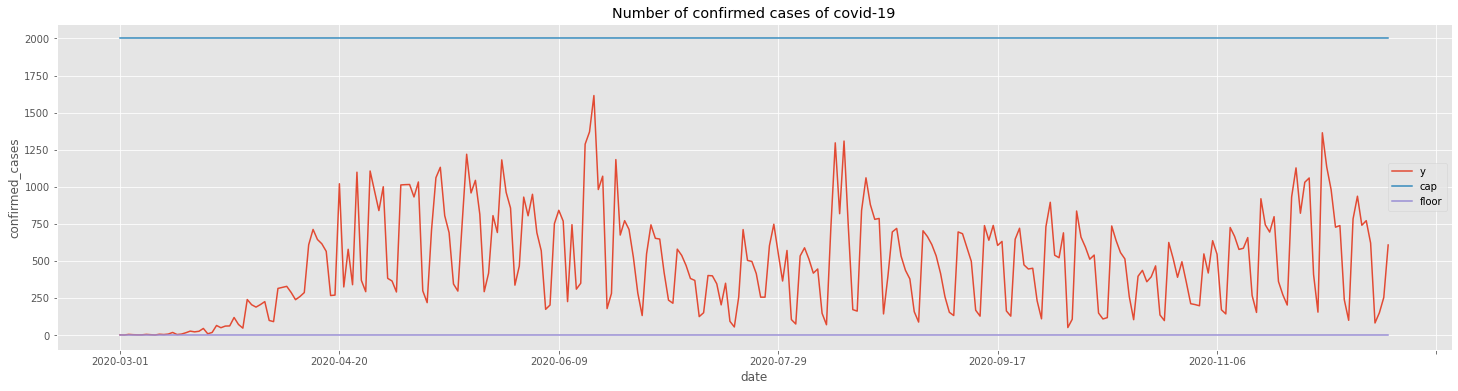

In [7]:
ts['cap'] = 2000
ts['floor'] = 0
ts.set_index('ds', drop=True).plot(figsize=(25, 6), title="Number of confirmed cases of covid-19", xlabel='date', ylabel='confirmed_cases');

### Changepoints

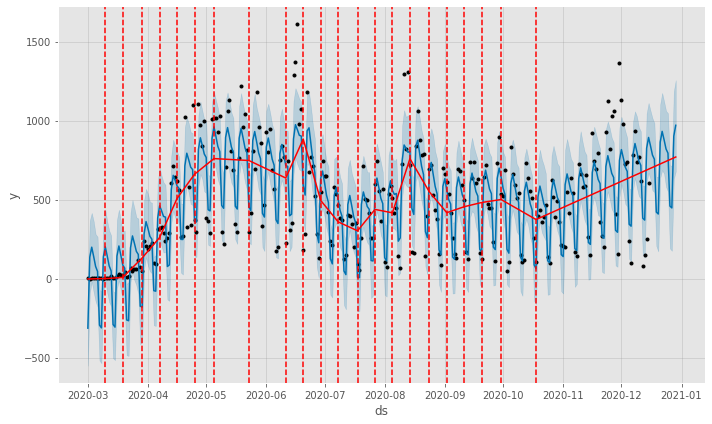

In [13]:
m = Prophet(
     changepoint_prior_scale=10,
     n_changepoints=25,
     changepoint_range=0.8,
     yearly_seasonality=False,
     daily_seasonality=False,
     weekly_seasonality=True)

m = m.fit(ts)
future = m.make_future_dataframe(periods=14)
forecast = m.predict(future)
fig = m.plot(forecast)
add_changepoints_to_plot(fig.gca(), m, forecast)
plt.show()